---
author: Rishabh Mondal
title: Different Distribution Samples 
date: '2023-02-07'
---

### Bernoulli, Categorical, Uniform, Normal, Beta and Gamma distributions

### Some imports

In [15]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import math
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

***Notes***

TUEplots: Extend matplotlib for scientific publications

### A function to make the Matplotlib plots prettier


In [13]:
SPINE_COLOR = 'red'

def format_axes(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

### Pre-defined values

In [6]:

n_samples=10000
seed=42
p=0.4
num_categories=5


### Uniform distribution 

A continuous random variable X is said to have a Uniform distribution over the interval [a,b] , shown as X∼Uniform(a,b)
, if its PDF is given by
$$
X(x) = \begin{cases}
1 & \text{if } a < x < b \\
0 & \text{if } b \leq x < a \\
\end{cases}
$$

We can also plot and visualise the same phenomenon using a histogram shown below.

<Axes: >

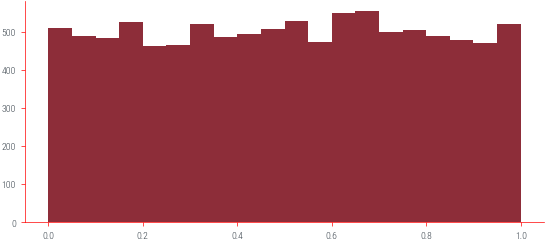

In [16]:
distribution = torch.distributions.Uniform(0, 1)
random_numbers = distribution.sample((n_samples,))
plt.hist(random_numbers.numpy(), bins=20)
format_axes(plt.gca())


We can notice that all outcomes within a given range are equally likely , ploted as a rectangular graph. 


### Bernoulli distribution 

Bernoulli Distribution is a discrete probability distribution used for experiments with yes/no outcomes. It represents a single trial with two possible outcomes: success (1) with probability p or failure (0) with probability (1 - p). 

$$
f(x, p) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 \\
\end{cases}
$$


We can also express this formula as:
$$
PMF = f(x, p) = px(1 - p)^{1 - x}, \text{ where } x \in \{0, 1\}
$$

<Axes: >

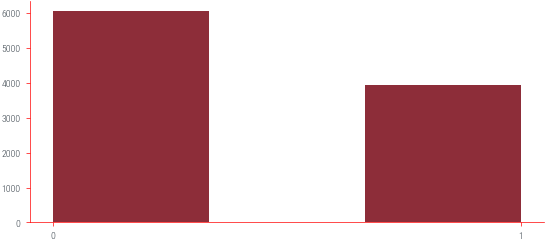

In [20]:
from torch.distributions import Bernoulli
p=torch.tensor(p)
Bernoulli_samples = Bernoulli(probs=p,logits=None).sample((n_samples,))
plt.hist(Bernoulli_samples.numpy(), bins=3)
plt.xticks([0, 1], ['0', '1'])
format_axes(plt.gca())

**Important things to note**

`probs`: Directly known probability values (0-1), providing a direct interpretation of probabilities.

`logits`: Log-odds or transformed probabilities (using sigmoid) useful for like LR or NN models outputting logits.

### Categorical distribution 

***Story*** - In a set of discrete outcomes, each outcome is assigned a probability.

***Example*** - The student has a $p_{a}$ probability of studying, a $p_{b}$ probability of going out with friends, and a $p_{c}$ probability of watching a movie.

$$
f(x; p_1, p_2, ..., p_k) = 
\begin{cases}
p_1 & \text{if } x = 1 \\
p_2 & \text{if } x = 2 \\
\vdots \\
p_k & \text{if } x = k \\
\end{cases}
$$

 

<Axes: >

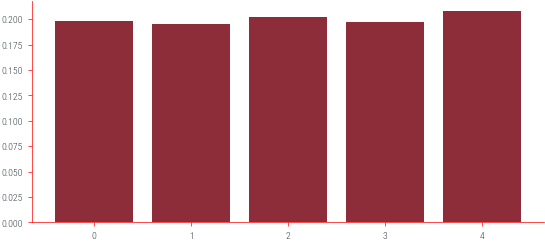

In [24]:
from torch.distributions import Categorical
categorical_distribution = Categorical(torch.ones(num_categories))
categorical_numbers = categorical_distribution.sample((n_samples,))
category_counts = torch.bincount(categorical_numbers)
# Compute the probabilities
probabilities = category_counts / n_samples
plt.bar(range(len(probabilities)), probabilities)
format_axes(plt.gca())


***Support*** -
If we index the categories with sequential integers from 1 to N, the distribution is supported for integers 1 to N, inclusive when described using the indices of the categories.

### Normal distribution 

***Story*** - The normal distribution arises when many small factors contribute to a quantity without any extreme variations, resulting in a bell-shaped curve.

***Example*** - When measuring the heights of a large population, we typically find that the distribution follows a bell-shaped curve, with the majority of individuals clustering around the average height and fewer individuals at the extremes (very tall or very short)

$$
f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

***Moments***

Mean: $\mu$ , 
Variance: $\sigma$

<Axes: >

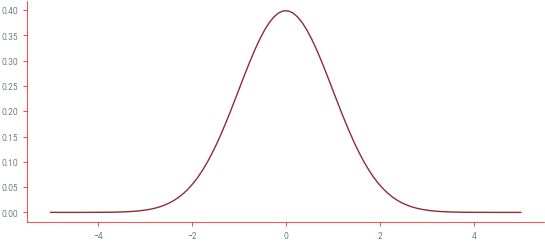

In [35]:
from torch.distributions import Normal
mean = torch.tensor([0.0])
stddev = torch.tensor([1.0])
dist = Normal(mean, stddev)
x = np.linspace(-5, 5, 100)
# Calculate the corresponding probability density for each x
pdf = torch.exp(dist.log_prob(torch.tensor(x))).numpy()

# Plot the normal distribution
plt.plot(x, pdf)
format_axes(plt.gca())

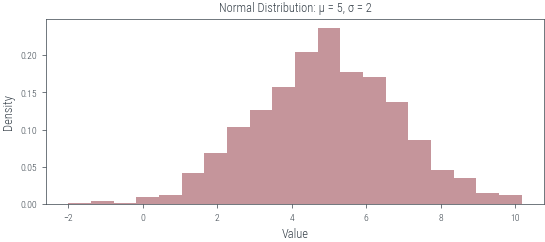

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the original normal distribution
mu = 0
sigma = 1

# Set the desired mean and standard deviation of the converted normal distribution
a = 5
b = 2

# Generate random samples from the standard normal distribution
x = np.random.normal(mu, sigma, 1000)

# Apply the transformation to convert to the desired normal distribution
y = a + b * x

# Plot the histogram of the converted normal distribution
plt.hist(y, bins=20, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Normal Distribution: μ = {a}, σ = {b}')
plt.show()


### Beta distributions 

***Story*** : Let's say you have two processes, each consisting of multiple steps. Both processes occur at the same rate, but the first process requires $\alpha$ step and the second process $\beta$ ,the fraction of the total waiting time taken by the first process is Beta distributed .

***Example*** : Include the Click-Through Rate (CTR) of an advertisement, the conversion rate of customers purchasing on your website.

$$f(x; \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)}$$

where 

$$B(\alpha, \beta) = \int_0^1 x^{\alpha-1} (1-x)^{\beta-1} dx$$

***Support*** : The Beta distribution has support on the interval [0, 1].

***Moments*** :

$\mu = \frac{\alpha}{\alpha + \beta}$

$\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$



<Axes: >

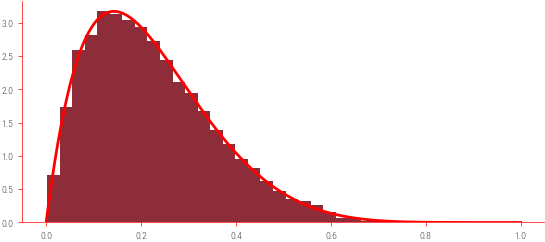

In [46]:
alpha = 2
beta = 7
# Create a Beta distribution object
beta_dist = torch.distributions.Beta(alpha, beta)
samples = beta_dist.sample((n_samples,))
samples_np = samples.numpy()
plt.hist(samples_np, bins=30, density=True)

# Plot the probability density function (PDF)
x = torch.linspace(0, 1, n_samples)
pdf = beta_dist.log_prob(x).exp()
plt.plot(x.numpy(), pdf.numpy(), 'r-', linewidth=2)
format_axes(plt.gca())

### Gamma distrubution


<Axes: >

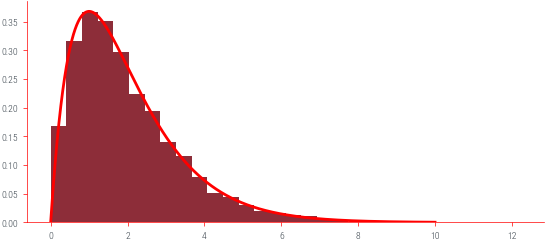

In [47]:
alpha = 2.0
beta = 1.0
# Create a Gamma distribution object
gamma_dist = torch.distributions.Gamma(alpha, beta)
samples = gamma_dist.sample((n_samples,))
samples_np = samples.numpy()
plt.hist(samples_np, bins=30, density=True)

# Plot the probability density function (PDF)
x = torch.linspace(0, 10, n_samples)
pdf = gamma_dist.log_prob(x).exp()
plt.plot(x.numpy(), pdf.numpy(), 'r-', linewidth=2)
format_axes(plt.gca())

### Implementing a pseudo-random number generator (PRNG)

**Implementing a pseudo-random number generator (PRNG)** - Generates a sequence of numbers that exhibit properties of randomness

**Linear Congruential Generator (LCG)** is a simple PRNG algorithm - The LCG algorithm is defined by the recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ is the Next pseudo-random number.
- $X_n$ is the current pseudo-random number.
- $a$ is the multiplier , determines the period of the generated number.
- $c$ is the increment, shifts the generated sequence.
- $m$ is the modulus, determines the range of values .


***Integer Constant***

$m,{0<m}$ — The modulus

$a,0<a<m$ — The multiplier

$c,0<=c<m$ — The increment

$X_{0},0<X_{0}<m$ — The seed / start value



In [56]:
# Function for Linear Congruential Generator
def lcg(seed, n_samples):
    """
    Generates a sequence of pseudo-random numbers using the Linear Congruential Generator (LCG) algorithm.

    Args:
        seed (int): The seed value for the LCG algorithm.
        n_samples (int): The number of random numbers to generate.

    Returns:
        list: A list of pseudo-random numbers normalized to the range [0, 1].
    """
    a = 1103515245
    c = 12345
    m = 2 ** 31
    random_numbers = []

    for _ in range(n_samples):
        seed = (a * seed + c) % m
        random_number = seed / m  # Normalize to range [0, 1]
        random_numbers.append(random_number)

    return random_numbers


Plot histogram

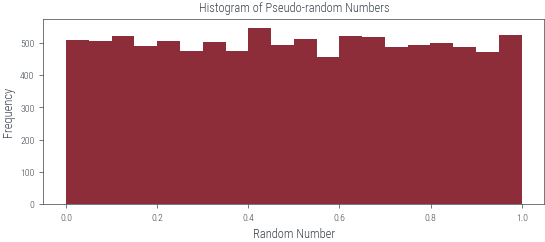

In [57]:

# Example usage:
random_numbers = lcg(seed, n_samples )

plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

### Uniform to Normal sampling

***Box Muller Method***

In [58]:
def uniform_to_normal_boxmuller(n_samples):
    """
    Generates a sequence of pseudo-random numbers from a standard normal distribution using the Box-Muller method.

    Args:
        n_samples (int): The number of random numbers to generate.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the standard normal distribution.
    """
    uniform_distribution = dist.Uniform(0, 1)
    random_numbers = []

    for _ in range(n_samples // 2):
        u1 = uniform_distribution.sample()
        u2 = uniform_distribution.sample()

        z1 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * math.pi * u2)
        z2 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * math.pi * u2)

        random_numbers.append(z1)
        random_numbers.append(z2)

    if n_samples % 2 != 0:
        u = uniform_distribution.sample()
        z = torch.sqrt(-2 * torch.log(u)) * torch.cos(2 * math.pi * uniform_distribution.sample())
        random_numbers.append(z)

    return torch.stack(random_numbers)

In ***Normal Distribution*** Values are ***symmetrically distributed*** around a central mean. For example, heights in a population follow a ***bell-shaped*** curve, with the most common values near the mean and fewer occurrences as we move away from it. Graphically, it is represented by a bell-shaped curve.